![Python](https://img.shields.io/badge/python-3.9-blue)
![Status: Pending Migration](https://img.shields.io/badge/status-pending%20migration-orange)

<a id="table-of-contents"></a>
# 📖 Deep Learning

- [🧠 Why Go Deeper?](#why-go-deeper)
- [🔧 Setup Problem and Dataset](#setup-problem-and-dataset)
- [🏗️ Build Deep MLP](#build-deep-mlp)
    - [🧱 Define Architecture](#define-architecture)
    - [🚀 Train Deep MLP](#train-deep-mlp)
    - [📈 Visualize Loss and Decision Boundary](#visualize-deep-mlp-results)
- [🧠 High-Level Intro to CNNs](#intro-to-cnns)
    - [🔲 When Do You Need CNNs?](#cnn-use-cases)
    - [⚙️ CNN Layers Explained](#cnn-building-blocks)
    - [📦 CNN with Keras/Torch](#cnn-code-demo)
- [🔚 Closing Notes](#closing-notes)
___

<a id="why-go-deeper"></a>
# 🧠 Why Go Deeper?



<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🔹 Shallow vs. Deep Networks
- Shallow networks (e.g., single-layer perceptrons) can only model **simple patterns**.
- Deep networks enable modeling of **complex, layered abstractions**.


##### 🔹 Hierarchical Representations
- Lower layers learn basic features: **edges, colors, shapes**.
- Higher layers combine them into complex structures: **objects, semantics, meanings**.
- This mirrors how humans understand the world — **from pixels to concepts**.

##### 🔹 Efficiency and Expressiveness
- Some functions are **exponentially more efficient** to represent with deeper architectures.
- A single hidden layer can approximate anything (Universal Approximation Theorem), but may:
  - Require **massive neurons**
  - Be **harder to train** or generalize

##### 🔹 Real-World Successes
- Deep networks power breakthroughs in:
  - **Computer Vision** (CNNs)
  - **Natural Language** (Transformers)
  - **Speech Recognition** (RNNs, CNNs)
- Architectures like ResNet, BERT, and GPT are deep by design — and that depth is **not optional**.

</details>


[Back to the top](#table-of-contents)
___


<a id="setup-problem-and-dataset"></a>
# 🔧 Setup Problem and Dataset



In [5]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate synthetic classification dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

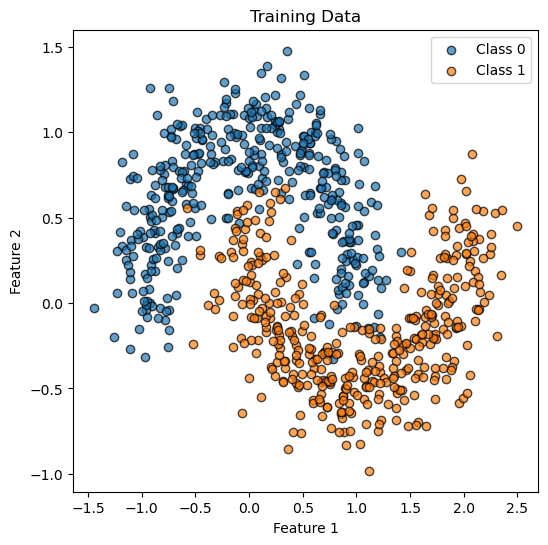

In [3]:
import matplotlib.pyplot as plt

# Plot the dataset
plt.figure(figsize=(6, 6))
for label, color in zip([0, 1], ['#1f77b4', '#ff7f0e']):
    plt.scatter(
        X_train[y_train == label, 0],
        X_train[y_train == label, 1],
        c=color,
        label=f"Class {label}",
        edgecolors='k',
        alpha=0.7
    )

plt.title("Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show();


[Back to the top](#table-of-contents)
___


<a id="build-deep-mlp"></a>
# 🏗️ Build Deep MLP



<a id="define-architecture"></a>
#### 🧱 Define Architecture



<details><summary><strong>📖 Click to Expand</strong></summary>

##### Deep MLP Architecture

- We stack **two hidden layers** with **ReLU activations**:
  - Input → 16 units → ReLU → 16 units → ReLU → Output
- Each `nn.Linear` layer performs a linear transformation:
  \[ \text{output} = XW + b \]
- `nn.Sequential` lets us chain layers cleanly
- Output dimension is 2 since we're doing **binary classification with `CrossEntropyLoss`** (expects logits over 2 classes)

This structure is far more expressive than a single hidden layer from the previous notebook.

</details>


In [4]:
import torch.nn as nn

# Simple deep MLP using Sequential
model = nn.Sequential(
    nn.Linear(2, 16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 2)
)

print(model)


Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=2, bias=True)
)


<a id="train-deep-mlp"></a>
#### 🚀 Train Deep MLP



<details><summary><strong>📖 Click to Expand</strong></summary>

##### Training the Deep MLP

- **Loss Function:** `CrossEntropyLoss` expects raw logits (no softmax) and integer labels (`0` or `1`)
- **Optimizer:** `Adam` is often a strong default for training deep networks
- **Epochs:** 100 is enough for this simple problem; early stopping can be added later
- We track `loss.item()` to visualize convergence
- At each epoch:
  - Clear gradients
  - Forward pass → Loss → Backward pass → Optimizer step

This loop is low-level and transparent — useful for learning and debugging.

</details>


In [6]:
import torch
import torch.optim as optim
from sklearn.metrics import accuracy_score

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    train_losses.append(loss.item())

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


Epoch 10/100, Loss: 0.5397
Epoch 20/100, Loss: 0.3383
Epoch 30/100, Loss: 0.2849
Epoch 40/100, Loss: 0.2449
Epoch 50/100, Loss: 0.2109
Epoch 60/100, Loss: 0.1720
Epoch 70/100, Loss: 0.1300
Epoch 80/100, Loss: 0.0997
Epoch 90/100, Loss: 0.0821
Epoch 100/100, Loss: 0.0740


<a id="visualize-deep-mlp-results"></a>
#### 📈 Visualize Loss and Decision Boundary



<details><summary><strong>📖 Click to Expand</strong></summary>

##### Visualizing the Results

- **Loss Curve** helps verify learning — it should **decrease smoothly** (though not necessarily perfectly)
- **Decision Boundary Plot** shows how well the model separates classes:
  - Background color indicates predicted class
  - Points are the actual test samples
- Useful to compare against shallow network from `01_neural_networks.ipynb`

Together, these plots help debug and **build intuition** about model behavior.

</details>


In [8]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Scatter(
            y=[round(l, 4) for l in train_losses],
            mode='lines',
            name='Training Loss',
            line=dict(color='royalblue'),
            hovertemplate='Epoch %{x}<br>Loss %{y:.4f}<extra></extra>'
        )
    ],
    layout=go.Layout(
        title='Loss Over Epochs',
        xaxis_title='Epoch',
        yaxis_title='Cross-Entropy Loss',
        template='plotly_white',
        width=700,
        height=400
    )
)

fig.show()


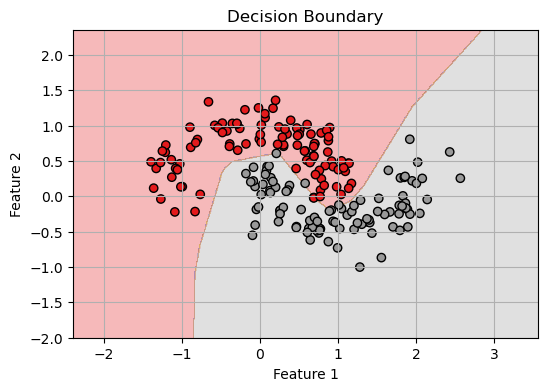

In [9]:
# Plot decision boundary
def plot_decision_boundary(model, X, y, resolution=0.01):
    model.eval()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    with torch.no_grad():
        probs = model(grid)
        preds = torch.argmax(probs, dim=1).reshape(xx.shape)
    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.Set1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

# Apply it to test data
plot_decision_boundary(model, X_test, y_test)


#### Visuzlize Model

In [27]:
from torchsummary import summary

summary(model, input_size=(2,))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 16]              48
              ReLU-2                   [-1, 16]               0
            Linear-3                   [-1, 16]             272
              ReLU-4                   [-1, 16]               0
            Linear-5                    [-1, 2]              34
Total params: 354
Trainable params: 354
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [28]:
from torchinfo import summary
summary(model, input_size=(1, 2))


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 2]                    --
├─Linear: 1-1                            [1, 16]                   48
├─ReLU: 1-2                              [1, 16]                   --
├─Linear: 1-3                            [1, 16]                   272
├─ReLU: 1-4                              [1, 16]                   --
├─Linear: 1-5                            [1, 2]                    34
Total params: 354
Trainable params: 354
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

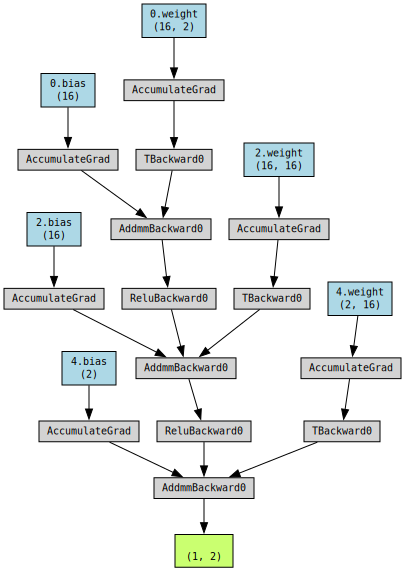

In [34]:
from torchviz import make_dot

# brew install graphviz      # if using Homebrew
# sudo apt-get install graphviz  # Debian/Ubuntu

# Dummy input to trace through model
dummy_input = torch.randn(1, 2)
make_dot(model(dummy_input), params=dict(model.named_parameters()))


In [30]:
def plot_mlp_from_model(model, input_dim=2):
    import plotly.graph_objects as go

    # Extract layer sizes
    layers = [input_dim]
    for layer in model:
        if isinstance(layer, nn.Linear):
            layers.append(layer.out_features)

    fig = go.Figure()
    x_spacing = 200
    y_spacing = 30
    x_offset = 0

    for layer_idx, num_nodes in enumerate(layers):
        for i in range(num_nodes):
            fig.add_trace(go.Scatter(
                x=[x_offset],
                y=[-i * y_spacing + (num_nodes - 1) * y_spacing / 2],
                mode="markers+text",
                marker=dict(size=28, color="lightblue" if layer_idx == 0 else ("royalblue" if layer_idx < len(layers) - 1 else "lightgreen")),
                text=[""] * num_nodes,
                textposition="middle center",
                hoverinfo='skip',
                showlegend=False
            ))

        # Draw connections
        if layer_idx < len(layers) - 1:
            for i in range(num_nodes):
                for j in range(layers[layer_idx + 1]):
                    x0 = x_offset
                    y0 = -i * y_spacing + (num_nodes - 1) * y_spacing / 2
                    x1 = x_offset + x_spacing
                    y1 = -j * y_spacing + (layers[layer_idx + 1] - 1) * y_spacing / 2
                    fig.add_shape(type="line", x0=x0, y0=y0, x1=x1, y1=y1,
                                  line=dict(color="gray", width=1))

        x_offset += x_spacing

    fig.update_layout(
        title=f"Visualized Architecture: {layers}",
        showlegend=False,
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        width=700,
        height=400,
        plot_bgcolor="white"
    )

    fig.show()


In [21]:
plot_mlp_from_model(model, input_dim=2)


In [39]:
!pip install pydot

!pip install graphviz


In [45]:
import pydot
import tensorflow.keras.utils
from tensorflow.keras.utils import plot_model


In [43]:
import pydot
from tensorflow.keras.utils import plot_model
print("Pydot is working ✅")


Pydot is working ✅


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model

import pydot
print(pydot.find_graphviz())


# Clean build: avoid warnings by using Input() as first layer
model_keras = Sequential([
    Input(shape=(2,)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2)
])

# Generate model plot
plot_model(model_keras, show_shapes=True, show_layer_names=True)


AttributeError: module 'pydot' has no attribute 'find_graphviz'

In [32]:
torch.onnx.export(model, torch.randn(1, 2), "model.onnx")


================ Diagnostic Run torch.onnx.export version 2.0.1 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



OnnxExporterError: Module onnx is not installed!

[Back to the top](#table-of-contents)
___


<a id="intro-to-cnns"></a>
# 🧠 High-Level Intro to CNNs



<details><summary><strong>📖 Click to Expand</strong></summary>

##### What is a Convolutional Neural Network (CNN)?

- A CNN is a specialized type of neural network designed to work with **grid-like data**, most commonly **images**.
- It extracts **spatial patterns** by using convolution filters that scan over input data.
- Unlike traditional MLPs, CNNs don't look at the whole input at once — they learn **local patterns first**, then combine them into high-level features.

##### Why CNNs Work So Well

- They leverage two key ideas:
  - **Local Receptive Fields**: Look at small patches of input at a time (e.g., 3×3 pixels)
  - **Weight Sharing**: The same filter slides across the input — dramatically reducing the number of parameters

##### What Makes Them Special?

- Great at capturing **hierarchical features** (edges → textures → shapes → objects)
- **Translation invariance** — recognize patterns regardless of where they occur in the image
- The backbone of modern Computer Vision (used in ResNet, VGG, EfficientNet, etc.)

</details>


<a id="cnn-use-cases"></a>
#### 🔲 When Do You Need CNNs?



<details><summary><strong>📖 Click to Expand</strong></summary>

##### When to Use CNNs

Use CNNs when your data has **spatial or structured patterns** — meaning **where** something appears is just as important as **what** it is.

##### Common Use Cases

- **Image Classification**  
  Identify what's in an image (e.g., cat vs. dog)

- **Object Detection**  
  Locate and label multiple objects inside a single image

- **Semantic Segmentation**  
  Classify each pixel of an image into meaningful categories

- **Medical Imaging**  
  Detect tumors, segment tissues, analyze scans

- **Time-Series with Local Patterns**  
  Yes — 1D CNNs can be used for sequences (e.g., ECG, sensor data)

- **Text Classification (alternative to RNNs)**  
  1D convolutions can pick up phrase-level patterns in text

##### When NOT to Use CNNs

- If data is **tabular**, **independent features**, or lacks **locality** — stick to MLPs or tree-based methods

</details>


<a id="cnn-building-blocks"></a>
#### ⚙️ CNN Layers Explained



<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🧱 Key Building Blocks of CNNs

- **Convolutional Layer (`nn.Conv2d`)**  
  - Applies learnable filters (kernels) across input image
  - Captures **local spatial patterns**
  - Filters slide across height and width (not depth)

- **Activation Function (`ReLU`)**  
  - Adds **non-linearity** to help the network learn complex functions
  - Applied element-wise after convolutions

- **Pooling Layer (`MaxPool2d`)**  
  - Downsamples the feature map
  - Reduces **spatial dimensions**, making the model faster and translation-tolerant
  - Common: Max pooling (most active signal survives)

- **Batch Normalization (`BatchNorm2d`)**  
  - Normalizes activations to stabilize and speed up training
  - Applied between Conv and ReLU layers

- **Dropout (`nn.Dropout`)**  
  - Randomly turns off neurons during training to prevent overfitting

- **Flatten Layer**  
  - Converts final feature maps into a flat vector
  - Prepares the data for fully connected layers (classification)

- **Fully Connected Layer (`Linear`)**  
  - Learns global combinations of features
  - Final decision-making layer

These blocks are stacked in various ways to create powerful CNN architectures.

</details>


<a id="cnn-code-demo"></a>
#### 📦 CNN with Keras/Torch



<details><summary><strong>📖 Click to Expand</strong></summary>

##### CNN on Non-Image Data?

- This example **forces a CNN** on a toy dataset (2D points), just to demo CNN mechanics
- Input is reshaped to **1×2×1**, mimicking an image with:
  - **1 channel**
  - **2 rows** (features)
  - **1 column**

##### Why This Works

- The `Conv2d` kernel is shaped `(2×1)` to fully scan both input features
- `Flatten` converts output into a vector
- Final `Linear` layer outputs logits for binary classification

##### Real Use

- In practice, CNNs are used on actual 2D/3D spatial data (images, spectrograms, etc.)
- This block shows CNN syntax and computation steps — the real benefit comes in downstream vision use cases

</details>


In [10]:
import torch.nn as nn

# Reshape input: [N, 2] → [N, 1, 2, 1] to mimic a "1D image" for CNN
X_train_img = X_train_tensor.view(-1, 1, 2, 1)
X_test_img = X_test_tensor.view(-1, 1, 2, 1)

# Simple CNN model (1D-style input but with Conv2D)
cnn_model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=4, kernel_size=(2,1)),  # kernel covers entire 2D row
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(4, 2)
)

print(cnn_model)


Sequential(
  (0): Conv2d(1, 4, kernel_size=(2, 1), stride=(1, 1))
  (1): ReLU()
  (2): Flatten(start_dim=1, end_dim=-1)
  (3): Linear(in_features=4, out_features=2, bias=True)
)


[Back to the top](#table-of-contents)
___


<a id="closing-notes"></a>
# 🔚 Closing Notes


<details><summary><strong>📖 Click to Expand</strong></summary>

##### What We Covered in This Notebook

- Built on top of the basic neural net foundation from the previous notebook
- Introduced **deeper MLPs** and trained them on the same classification problem
- Visualized how adding depth helps in learning **non-linear decision boundaries**
- Introduced **CNNs**:
  - When to use them
  - Their key components (Conv, Pooling, Flatten, etc.)
  - How to implement a simple version in PyTorch

##### What Comes Next

- In the next notebook, we go deeper into **Transformer architectures**:
  - Understand self-attention and embeddings
  - See how they replaced CNNs for many GenAI tasks

This notebook sets up the **architectural intuition** needed to move toward modern LLMs.

</details>


[Back to the top](#table-of-contents)
___
